In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./datasets/건물_30년 초과.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
1,영등포구,2016-01-02,55.90,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,33,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,28500
2,서대문구,2016-01-03,66.12,6,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,47,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,15200
3,강남구,2016-01-04,25.27,3,1918.760010,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1190.35,99.6,177.148845,0.14,1074.70,0.7,51000
4,강동구,2016-01-04,41.62,2,1918.760010,0.34,26.9,9894,1.77,2.03,...,1.50,33,83.3,1190.35,99.6,177.148845,0.14,1074.70,0.7,41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65821,서대문구,2022-12-30,54.02,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,48,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,53459
65822,노원구,2022-12-31,41.30,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,39000
65823,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000
65824,강남구,2022-12-31,76.79,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,43,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,184000


In [5]:
# 원하는 컬럼 선택
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리',
        '건물연식', 'GDP대비가계부채비율',
        'EPU', '장단기금리spread','LTV', '물건금액(만원)']]

In [6]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])

C:\Users\이은진\AppData\Local\Temp\ipykernel_11060\4112030606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['계약일'] = pd.to_datetime(df['계약일'])


In [7]:
train_df = df.loc[df['계약일'] < '2021']

In [8]:
test_df = df.loc[df['계약일'] >= '2021']

In [9]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [10]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

In [11]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [12]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

53765    5.439333
53766    5.250420
53767    4.995635
53768    5.129690
53769    5.332438
           ...   
65821    4.728021
65822    4.591065
65823    5.267172
65824    5.264818
65825    5.139879
Name: 물건금액(만원), Length: 12061, dtype: float64

# OLS 확인

In [13]:
# OLS 확인
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     5950.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:28:13   Log-Likelihood:                 2933.6
No. Observations:               53765   AIC:                            -5849.
Df Residuals:                   53756   BIC:                            -5769.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6969      0.009    526.784      0.000       4.679       4.714
건물면적(㎡)         1.7888      0.010    185.618      0.000       1.770       1.808
층               0.0641      0.007      9.863      0.000       0.051       0.077
Fed기준금리        -0.1816      0.005    -37.279      0.000      -0.191      -0.172
건물연식            0.1357      0.007     20.400      0.000       0.123       0.149
GDP대비가계부채비율    -0.1229      0.007    -17.476      0.000      -0.137      -0.109
EPU            -0.0427      0.007     -6.521      0.000      -0.056      -0.030
장단기금리spread     0.0465      0.005      8.979      0.000       0.036       0.057
LTV            -0.2892      0.006    -50.516      0.000      -0.300      -0.278
==============================================================================
Omnibus:                      348.302   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.664
Skew:                          -0.112   Prob(JB):                     5.65e-63
Kurtosis:                       2.722   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF 확인

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [15]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    5.044321      건물면적(㎡)
1    4.514836            층
2    3.218791      Fed기준금리
3    1.976981         건물연식
4    5.336948  GDP대비가계부채비율
5    4.028635          EPU
6    8.271084  장단기금리spread
7    5.006571          LTV


# LinearRegression

# CV - R2, MSE

In [16]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [17]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.50286,           Validation Score_r2 = 0.23779
      Train Score_mse = 0.05097,           Validation Score_mse = 0.0626


Fold 2: Train Score_r2 = 0.49527,           Validation Score_r2 = 0.32629
      Train Score_mse = 0.05154,           Validation Score_mse = 0.05789


Fold 3: Train Score_r2 = 0.48496,           Validation Score_r2 = 0.39454
      Train Score_mse = 0.04892,           Validation Score_mse = 0.06945


Fold 4: Train Score_r2 = 0.45912,           Validation Score_r2 = 0.50161
      Train Score_mse = 0.05305,           Validation Score_mse = 0.05108


Fold 5: Train Score_r2 = 0.42076,           Validation Score_r2 = 0.57649
      Train Score_mse = 0.05617,           Validation Score_mse = 0.04486


CV 평균 R2 : 0.4073
CV 평균 MSE : 0.0572


# 평가지표 train and test 시각화

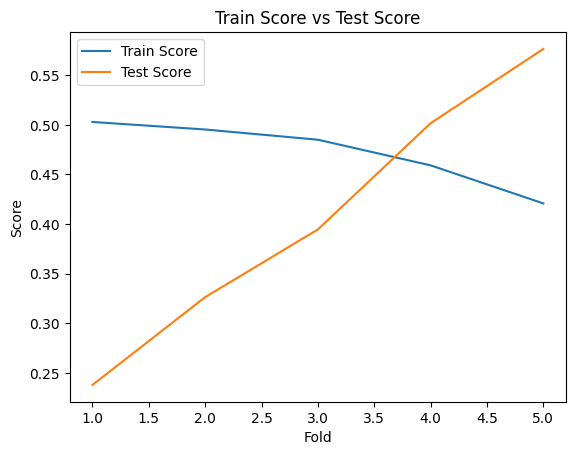

In [18]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

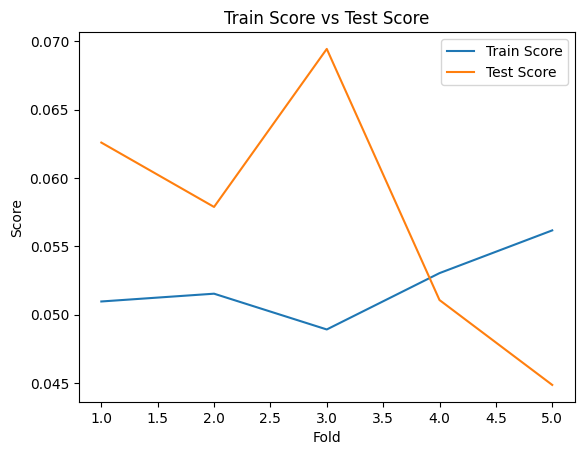

In [19]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

# Model 확정
- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 네 번째로 확정

In [20]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.040, RMSE :  0.200, MAE: 0.200
Variance score :  0.599




In [21]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][3].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
건물면적(㎡),1.739757
건물연식,0.084460
장단기금리spread,0.073746
층,0.061983
EPU,-0.050322
GDP대비가계부채비율,-0.147844
Fed기준금리,-0.204212
LTV,-0.307297


# Ridge & Lasso

## Ridge

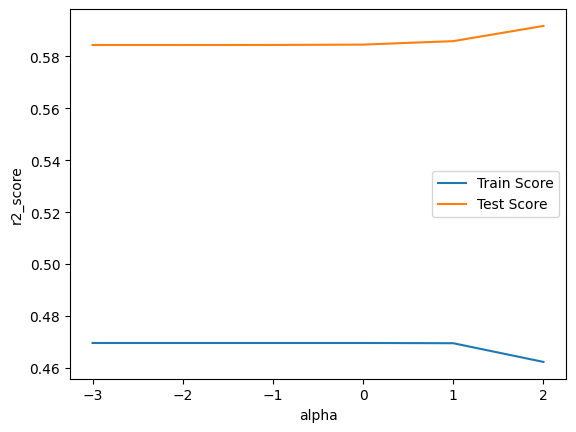

In [22]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- 기본값 alpha = 1.0으로 진행

# CV

In [23]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.50286,           Validation Score_r2 = 0.23858
      Train Score_mse = 0.05097,           Validation Score_mse = 0.06253


Fold 2: Train Score_r2 = 0.49527,           Validation Score_r2 = 0.32636
      Train Score_mse = 0.05154,           Validation Score_mse = 0.05788


Fold 3: Train Score_r2 = 0.48496,           Validation Score_r2 = 0.39417
      Train Score_mse = 0.04892,           Validation Score_mse = 0.06949


Fold 4: Train Score_r2 = 0.45912,           Validation Score_r2 = 0.50145
      Train Score_mse = 0.05305,           Validation Score_mse = 0.05109


Fold 5: Train Score_r2 = 0.42076,           Validation Score_r2 = 0.57624
      Train Score_mse = 0.05617,           Validation Score_mse = 0.04489


CV 평균 R2 : 0.4074
CV 평균 MSE : 0.0572


# 평가지표 train and test 차이 시각화

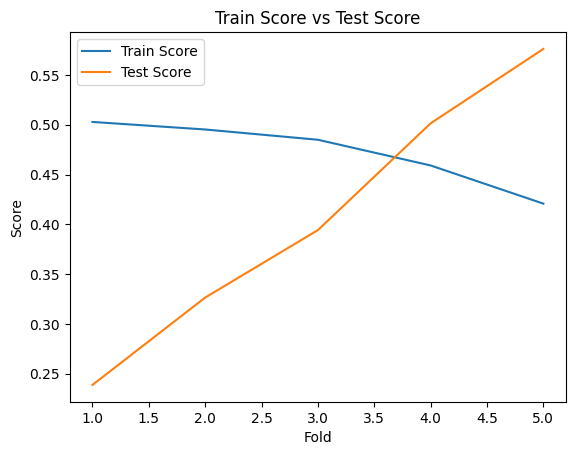

In [24]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [25]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.4696386729306232
0.5845182584839477


In [26]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.041, RMSE :  0.203, MAE: 0.203
Variance score :  0.585




In [27]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.040, RMSE :  0.200, MAE: 0.200
Variance score :  0.599




In [28]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][3].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),1.736220
건물연식,0.084783
장단기금리spread,0.073730
층,0.062224
EPU,-0.050325
GDP대비가계부채비율,-0.147868
Fed기준금리,-0.204110
LTV,-0.307260


In [29]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.14875893655973016


In [30]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True])